In [13]:

import pandas as pd
import numpy as np
import plotly as ply
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from matplotlib import cm
from matplotlib.colors import ListedColormap
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef

import random
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from random import randint
import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv('../../data/jm1.csv')
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [15]:
class_counts = df['defects'].value_counts()
print(class_counts)

defects
False    8779
True     2106
Name: count, dtype: int64


In [16]:
# Convert specified columns to float64
columns_to_convert = ['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']
for col in columns_to_convert:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('float64')
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.")

In [17]:
# Replace TRUE with 1 and FALSE with 0 in the 'defects' column
df['defects'] = df['defects'].replace({True: 1, False: 0})

In [18]:
# prompt: count total_Opnd

total_opnd_count = df['total_Opnd'].count()
print(f"The total count of 'total_Opnd' is: {total_opnd_count}")

The total count of 'total_Opnd' is: 10880


In [ ]:
df.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects                int64
dtype: object

In [20]:
X = df.drop('defects', axis=1).values
y = df['defects'].values

In [38]:
column_names = df.columns.tolist()
print(column_names)

['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects']


In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (10885, 21)
y shape: (10885,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


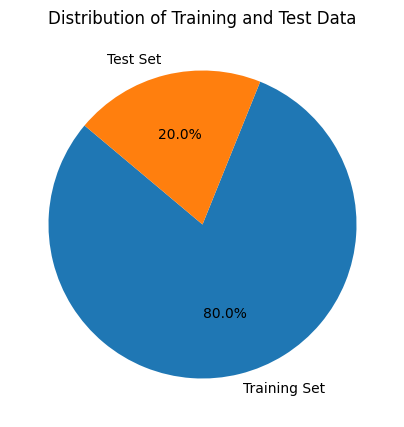

In [24]:
sizes = [len(X_train), len(X_test)]
labels = ['Training Set', 'Test Set']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Training and Test Data')
plt.show()

In [25]:
print("X_train data type:", type(X_train))
print("X_test data type:", type(X_test))
print("y_train data type:", type(y_train))
print("y_test data type:", type(y_test))


X_train data type: <class 'numpy.ndarray'>
X_test data type: <class 'numpy.ndarray'>
y_train data type: <class 'numpy.ndarray'>
y_test data type: <class 'numpy.ndarray'>


In [26]:
# Convert to tensor object
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [27]:
print(X_train)
print(y_train)


tensor([[ 11.,   3.,   1.,  ...,  14.,  10.,   5.],
        [128.,   2.,   1.,  ..., 343., 340.,   3.],
        [ 13.,   3.,   1.,  ...,  18.,  11.,   5.],
        ...,
        [ 47.,  12.,   1.,  ...,  73.,  49.,  14.],
        [ 11.,   1.,   1.,  ...,   0.,   0.,   1.],
        [283.,  37.,  11.,  ..., 385., 249.,  71.]])
tensor([0, 0, 0,  ..., 0, 1, 0])


In [29]:
model = ANN_model()


In [30]:
print(model.parameters)


<bound method Module.parameters of ANN_model(
  (f_connected1): Linear(in_features=21, out_features=40, bias=True)
  (f_connected2): Linear(in_features=40, out_features=40, bias=True)
  (out): Linear(in_features=40, out_features=2, bias=True)
)>


In [31]:
loss_function = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [32]:
def train_model(model, X_train, y_train, epochs=20, print_interval=100):
    model.train()  # Set model to training mode
    loss_values = []  # Track loss values over epochs

    for epoch in tqdm(range(epochs), desc='Training Epochs'):
        # Forward pass
        y_pred = model(X_train)

        # Compute loss
        loss = loss_function(y_pred, y_train)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store and optionally print the loss
        loss_values.append(loss.item())
        if (epoch + 1) % print_interval == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

    return loss_values


loss_values = train_model(model, X_train, y_train, epochs=1000)

Training Epochs:  17%|█▋        | 171/1000 [00:00<00:01, 486.85it/s]

Epoch [100/1000], Loss: nan
Epoch [200/1000], Loss: nan


Training Epochs:  41%|████      | 406/1000 [00:00<00:01, 567.67it/s]

Epoch [300/1000], Loss: nan
Epoch [400/1000], Loss: nan


Training Epochs:  58%|█████▊    | 579/1000 [00:01<00:00, 564.28it/s]

Epoch [500/1000], Loss: nan
Epoch [600/1000], Loss: nan


Training Epochs:  80%|███████▉  | 797/1000 [00:01<00:00, 516.20it/s]

Epoch [700/1000], Loss: nan
Epoch [800/1000], Loss: nan


Training Epochs: 100%|██████████| 1000/1000 [00:02<00:00, 491.86it/s]

Epoch [900/1000], Loss: nan
Epoch [1000/1000], Loss: nan


In [33]:
print(loss_values)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

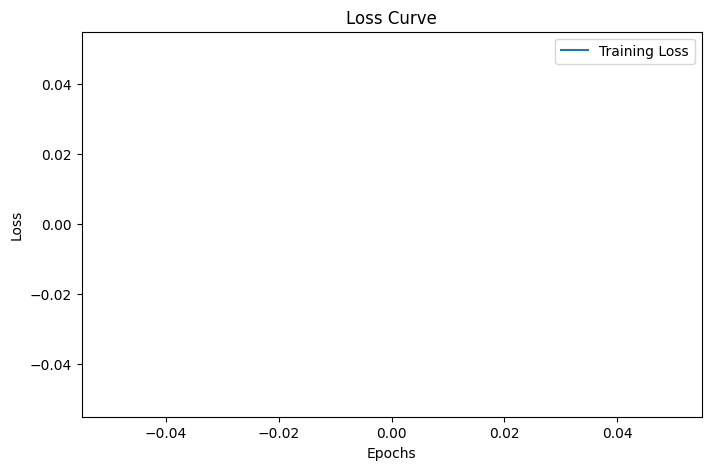

In [34]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(loss_values) + 1), loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()